<a href="https://colab.research.google.com/github/vyshnavineti/Agri-Vision-AI-/blob/main/IMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Path to the uploaded ZIP file
zip_file_path = "/content/Color.zip"

# Path to extract the files to
extract_to = "/content/drive/My Drive/unzipped_files"

# Extract the ZIP file
shutil.unpack_archive(zip_file_path, extract_to)

print(f"Files have been extracted to: {extract_to}")


Files have been extracted to: /content/drive/My Drive/unzipped_files


In [ ]:
import os
print(os.path.exists("/content/Color.zip"))  # Should return True if the file exists


True


# **POTATO DISEASE CLASSIFICATION**



# Machine Learning Models
Folowing are the 8 Machine Learning models used to classify potato disease  :

*   Logistic Regression
*   k-Nearest Neighbors (k-NN)

*   Support Vector Machine (SVM)
*   Decision Tree

*   Random Forest
*   Naive Bayes

*   Gradient Boosting

*   AdaBoost

# Logistic Regression

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input  # Updated import
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Step 1: Set up dataset directory
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"

# Step 2: Load and preprocess images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 3: Load the ResNet50 model (without the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create a model with ResNet50 base and pooling layer
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Extract features for the dataset
X = []
y = []

for inputs_batch, labels_batch in train_data:
    features_batch = feature_extractor.predict(inputs_batch)
    X.append(features_batch)
    y.append(labels_batch)
    if len(X) * batch_size >= train_data.samples:
        break

X = np.vstack(X)
y = np.vstack(y)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, np.argmax(y_train, axis=1))

# Step 6: Predict on the test set
y_pred = log_reg.predict(X_test)

# Step 7: Evaluate the model
print("Classification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred))
print("Accuracy Score:", accuracy_score(np.argmax(y_test, axis=1), y_pred))


Found 2151 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1

# K Nearest Nighbour (KNN)

Found 2151 images belonging to 3 classes.
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.47       200
           1       0.55      1.00      0.71       200
           2       1.00      0.16      0.28        31

    accuracy                           0.62       431
   macro avg       0.85      0.49      0.48       431
weighted avg       0.79      0.62      0.57       431

Accuracy Score: 0.617169373549884


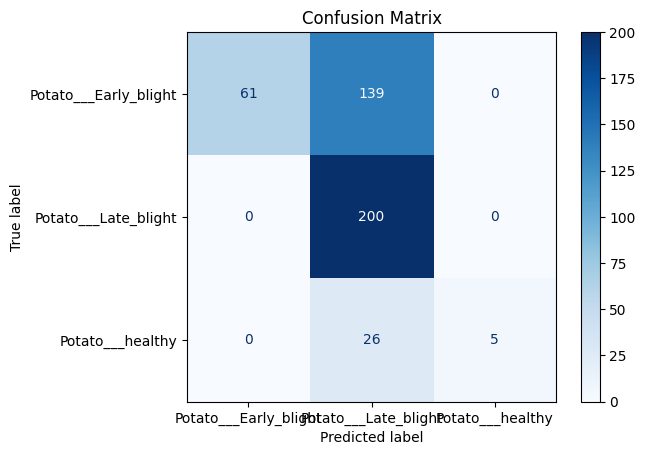

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this path as necessary

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)  # Change here to use next() directly
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Step 5: Flatten the Images for k-NN
# Flatten the images to 2D array for k-NN input
X_flattened = X.reshape(X.shape[0], -1)

# Step 6: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flattened, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Step 7: Train the k-NN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed
knn.fit(X_train, np.argmax(y_train, axis=1))

# Step 8: Predict on the Test Set
y_pred = knn.predict(X_test)

# Step 9: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy Score:", accuracy)

# Step 10: Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Support Vector Machine (SVM)

Found 2151 images belonging to 3 classes.
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       200
           1       0.87      0.96      0.91       200
           2       1.00      0.52      0.68        31

    accuracy                           0.91       431
   macro avg       0.94      0.80      0.85       431
weighted avg       0.92      0.91      0.91       431

Accuracy Score: 0.91415313225058


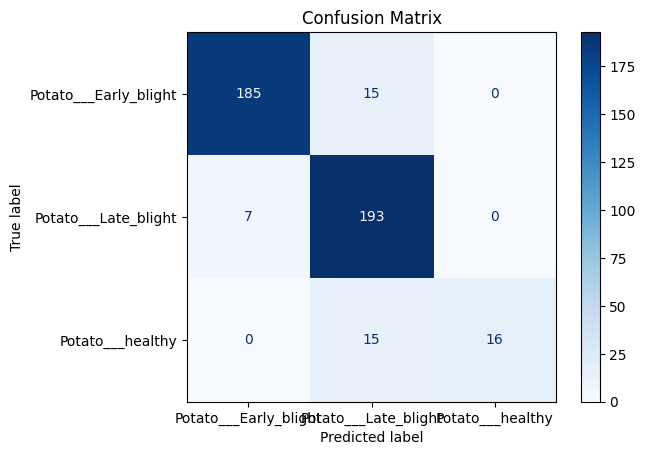

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this to your dataset path

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Adjust based on image size and memory
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Flatten the images for SVM (SVM expects a 2D array: (n_samples, n_features))
X_flat = X.reshape(X.shape[0], -1)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Convert labels from one-hot encoding to single class labels
y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)

# Step 6: Train an SVM Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train_svm)

# Step 7: Predict on the test set
y_pred = svm_model.predict(X_test)

# Step 8: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_svm, y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(y_test_svm, y_pred)
print("Accuracy Score:", accuracy)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_svm, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Decision Tree


Accuracy: 93.97%
Confusion Matrix:
[[192   5   0]
 [  7 190   6]
 [  1   7  23]]


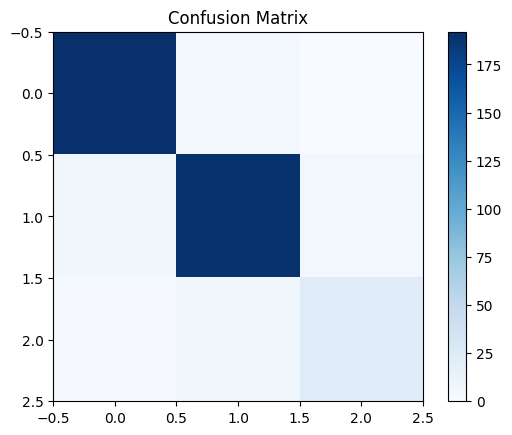

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess Image Data (example using color histograms)
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Resize the image
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])  # Color histogram
    hist = cv2.normalize(hist, hist).flatten()  # Normalize and flatten
    return hist

# Load the dataset
image_data = []
labels = []

# Assuming 'Potato' folder contains subfolders for each disease class
dataset_path = "/content/drive/MyDrive/unzipped_files/Color"

for label in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, label)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        features = extract_features(img_path)
        image_data.append(features)
        labels.append(label)

# Convert to NumPy arrays
X = np.array(image_data)
y = np.array(labels)

# Step 3: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Predict and Evaluate the Model
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 6: Display Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


# Random Forest

Found 2151 images belonging to 3 classes.
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       200
           1       0.89      0.91      0.90       200
           2       0.00      0.00      0.00        31

    accuracy                           0.87       431
   macro avg       0.58      0.63      0.60       431
weighted avg       0.81      0.87      0.84       431

Accuracy Score: 0.8723897911832946


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


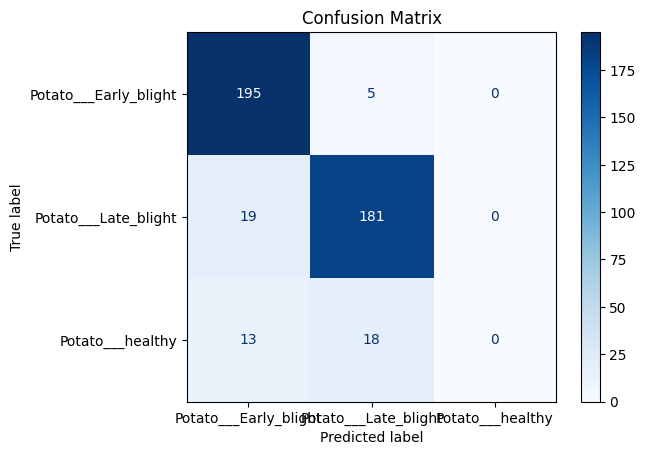

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this to your dataset path

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Adjust based on image size and memory
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Flatten the images for Random Forest (Random Forest expects a 2D array: (n_samples, n_features))
X_flat = X.reshape(X.shape[0], -1)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Convert labels from one-hot encoding to single class labels
y_train_rf = np.argmax(y_train, axis=1)
y_test_rf = np.argmax(y_test, axis=1)

# Step 6: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_rf)

# Step 7: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 8: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_rf, y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(y_test_rf, y_pred)
print("Accuracy Score:", accuracy)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_rf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Naive Bayes

Found 2151 images belonging to 3 classes.
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       200
           1       0.92      0.76      0.83       200
           2       0.34      0.68      0.46        31

    accuracy                           0.84       431
   macro avg       0.73      0.79      0.74       431
weighted avg       0.87      0.84      0.85       431

Accuracy Score: 0.8352668213457076


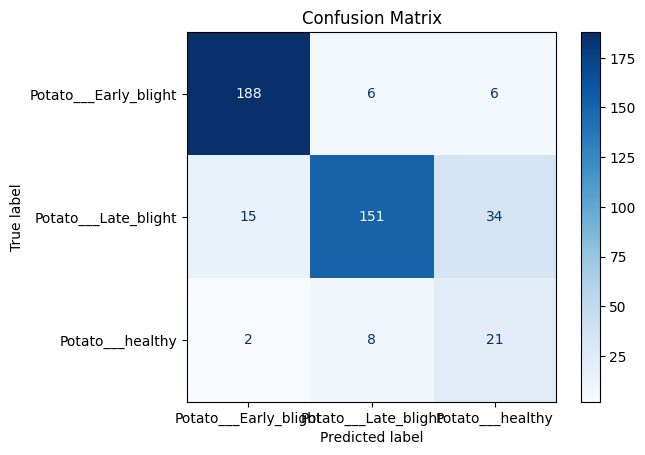

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this to your dataset path

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Adjust based on image size and memory
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Flatten the images for Naive Bayes (Naive Bayes expects a 2D array: (n_samples, n_features))
X_flat = X.reshape(X.shape[0], -1)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Convert labels from one-hot encoding to single class labels
y_train_nb = np.argmax(y_train, axis=1)
y_test_nb = np.argmax(y_test, axis=1)

# Step 6: Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_nb)

# Step 7: Predict on the test set
y_pred = nb_model.predict(X_test)

# Step 8: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(y_test_nb, y_pred)
print("Accuracy Score:", accuracy)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_nb, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting

Found 2151 images belonging to 3 classes.
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       200
           1       0.87      0.91      0.89       200
           2       1.00      0.26      0.41        31

    accuracy                           0.89       431
   macro avg       0.92      0.71      0.74       431
weighted avg       0.89      0.89      0.87       431

Accuracy Score: 0.8863109048723898


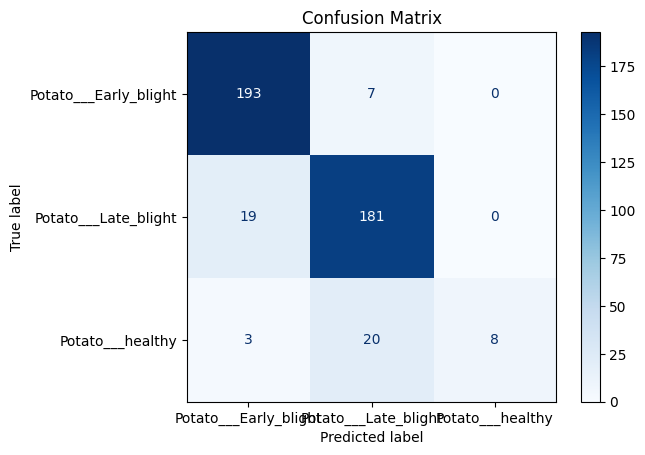

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this to your dataset path

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Adjust based on image size and memory
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Flatten the images for Gradient Boosting (Gradient Boosting expects a 2D array: (n_samples, n_features))
X_flat = X.reshape(X.shape[0], -1)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Convert labels from one-hot encoding to single class labels
y_train_gb = np.argmax(y_train, axis=1)
y_test_gb = np.argmax(y_test, axis=1)

# Step 6: Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train_gb)

# Step 7: Predict on the test set
y_pred = gb_model.predict(X_test)

# Step 8: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_gb, y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(y_test_gb, y_pred)
print("Accuracy Score:", accuracy)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_gb, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# AdaBoost

Found 2151 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       200
           1       0.77      0.94      0.84       200
           2       0.60      0.19      0.29        31

    accuracy                           0.84       431
   macro avg       0.77      0.66      0.68       431
weighted avg       0.84      0.84      0.83       431

Accuracy Score: 0.8375870069605569


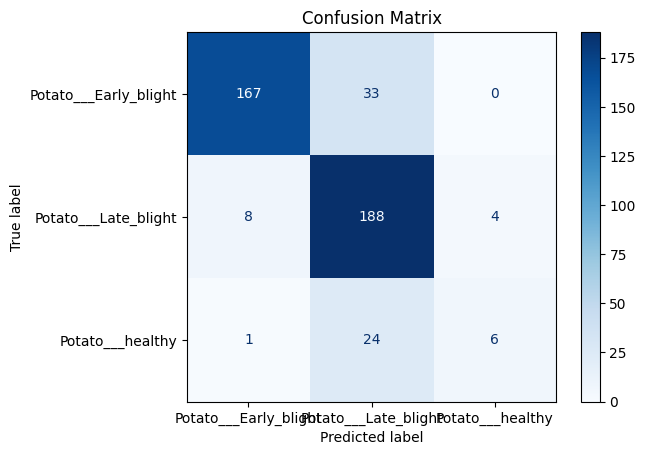

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this to your dataset path

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Adjust based on image size and memory
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Flatten the images for AdaBoost (AdaBoost expects a 2D array: (n_samples, n_features))
X_flat = X.reshape(X.shape[0], -1)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Convert labels from one-hot encoding to single class labels
y_train_ab = np.argmax(y_train, axis=1)
y_test_ab = np.argmax(y_test, axis=1)

# Step 6: Train an AdaBoost Classifier
# AdaBoost uses decision trees by default as base learners
ab_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ab_model.fit(X_train, y_train_ab)

# Step 7: Predict on the test set
y_pred = ab_model.predict(X_test)

# Step 8: Evaluate the Model
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_ab, y_pred))

# Calculate Accuracy Score
accuracy = accuracy_score(y_test_ab, y_pred)
print("Accuracy Score:", accuracy)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_ab, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Bagging Classifier

## Deep Learning Models

Folowing are the 7 Deep Learning models used to classify potato disease :


*   Convolutional Neural Networks (CNN)
*   Fully Convolutional Networks (FCN)
*Recurrent Neural Networks (RNN)
*Wide ResNet
*Neural Style Transfer
*Graph Convolutional Networks (GCN)
*Graph Neural Networks (GNN)


# **Convolutional Neural Networks (CNN)**

Found 2151 images belonging to 3 classes.
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 105s 7s/step - accuracy: 0.4776 - loss: 1.4311 - val_accuracy: 0.5100 - val_loss: 0.8851
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.5437 - loss: 0.9181 - val_accuracy: 0.7500 - val_loss: 0.7682
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.7959 - loss: 0.6782 - val_accuracy: 0.7600 - val_loss: 0.6525
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 723ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        47
           1       0.81      0.67      0.73        45
           2       0.00      0.00      0.00         8

    accuracy                           0.76       100
   macro avg       0.51      0.55      0.52       100
weighted avg       0.71      0.76      0.72       100

Accuracy Score: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


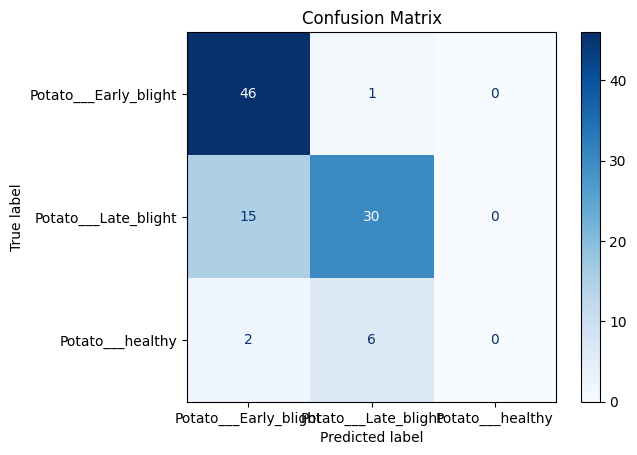

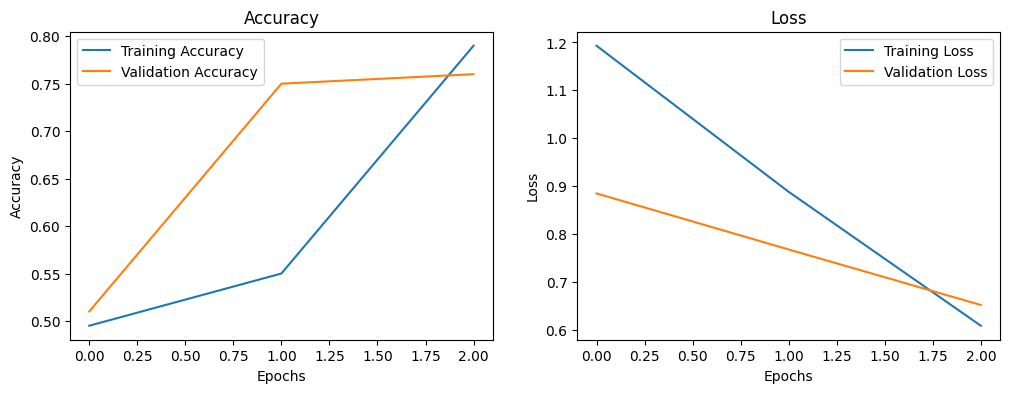

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this path as necessary

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Step 5: Split the Data into Training and Testing Sets
subset_size = 500  # Use a subset of 500 images for quick experimentation
X_train, X_test, y_train, y_test = train_test_split(
    X[:subset_size], y[:subset_size], test_size=0.2, random_state=42, stratify=np.argmax(y[:subset_size], axis=1)
)


# Step 6: Build the CNN Model
model = Sequential()
model.add(Input(shape=(224, 224, 3)))  # Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_data.class_indices), activation='softmax'))  # Output layer for number of classes

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

# Step 9: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Calculate Accuracy Score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy Score:", accuracy)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 11: Plot Training History (Optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Fully Convolutional Networks (FCN)**

Found 2151 images belonging to 3 classes.
Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.4648 - loss: 0.9486 - val_accuracy: 0.7773 - val_loss: 0.7881
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.6892 - loss: 0.7350 - val_accuracy: 0.8213 - val_loss: 0.4423
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.8558 - loss: 0.4047 - val_accuracy: 0.8910 - val_loss: 0.3235
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       200
           1       0.92      0.89      0.90       200
           2       0.54      0.45      0.49        31

    accuracy                           0.89       431
   macro avg       0.79      0.77      0.78       431
weighted avg       0.89      0.89      0.89       431

Accuracy Score: 0.8909512761020881


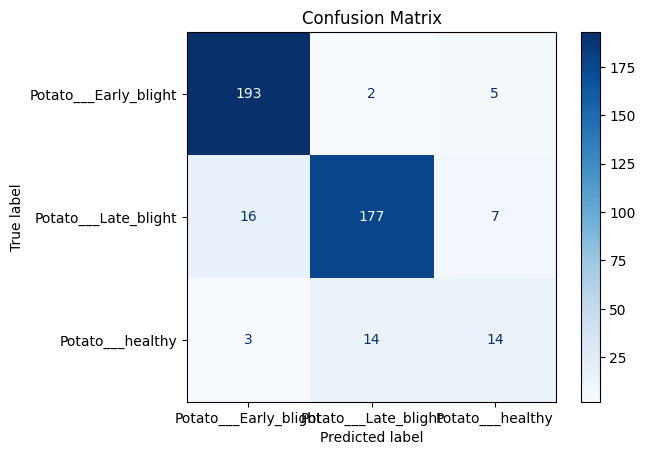

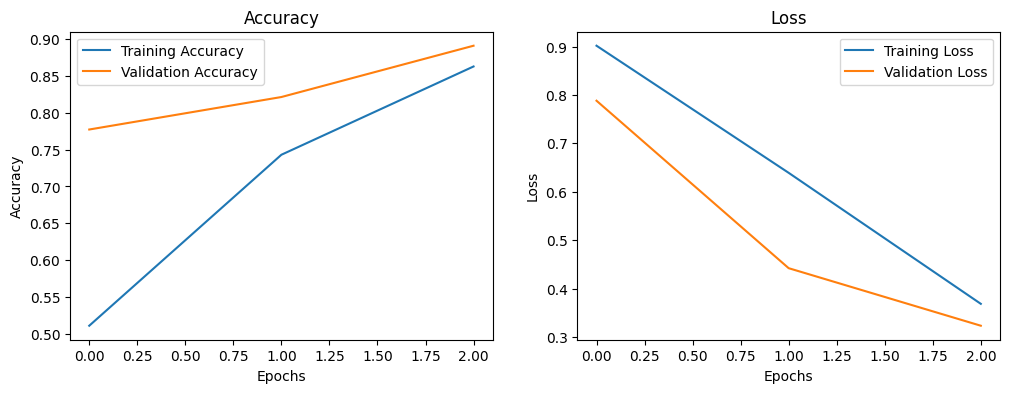

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this path as necessary

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Step 6: Build the FCN Model
model = Sequential([
    Input(shape=(224, 224, 3)),  # Explicitly define input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with softmax activation
])

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

# Step 9: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Calculate Accuracy Score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy Score:", accuracy)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 11: Plot Training History (Optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Recurrent Neural Networks (RNN)**

Found 2151 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.4932 - loss: 0.9473 - val_accuracy: 0.5754 - val_loss: 0.8401
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.7615 - loss: 0.6309 - val_accuracy: 0.5244 - val_loss: 1.1963
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.8379 - loss: 0.4727 - val_accuracy: 0.5568 - val_loss: 1.0985
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.8359 - loss: 0.4416 - val_accuracy: 0.6775 - val_loss: 0.7881
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.8659 - loss: 0.3752 - val_accuracy: 0.5963 - val_loss: 1.2137


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       200
           1       0.53      1.00      0.70       200
           2       0.00      0.00      0.00        31

    accuracy                           0.60       431
   macro avg       0.51      0.43      0.38       431
weighted avg       0.71      0.60      0.53       431

Accuracy Score: 0.5962877030162413


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


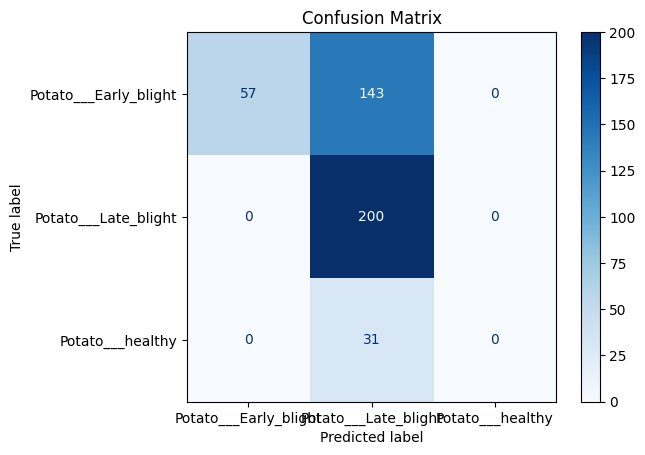

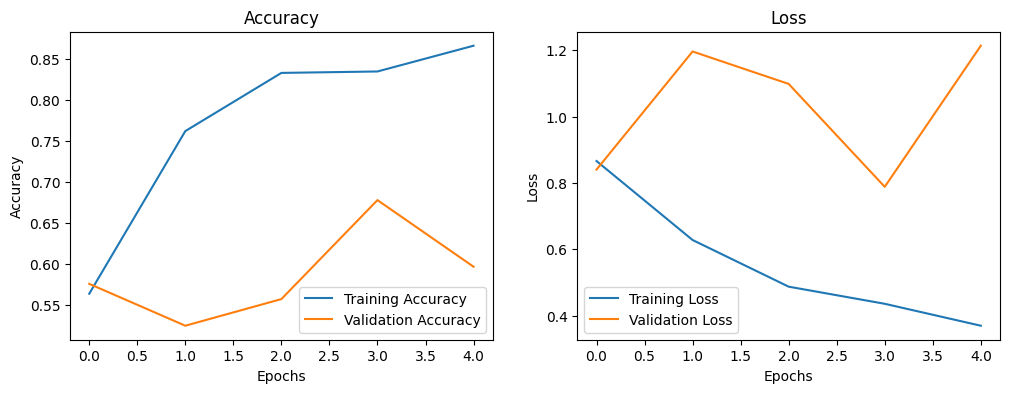

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, LSTM, Flatten, Dense
from tensorflow.keras.layers import Reshape, TimeDistributed
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this path as necessary

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Reduced size to make it manageable for processing
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Step 6: Build the CNN-RNN Model
model = Sequential()

# CNN Layers to extract spatial features
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening before passing to LSTM
model.add(Flatten())

# Reshape for LSTM input (batch_size, time_steps, features)
# Ensure the total number of elements matches
model.add(Reshape((36, 128)))  # 36 time steps, 128 features (36 * 128 = 4608)

# LSTM layer to process the sequential data
model.add(LSTM(64, return_sequences=False))

# Output layer
model.add(Dropout(0.5))
model.add(Dense(len(train_data.class_indices), activation='softmax'))

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Step 9: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Calculate Accuracy Score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy Score:", accuracy)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 11: Plot Training History (Optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# ResNet

Found 2151 images belonging to 3 classes.
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 518s 9s/step - accuracy: 0.4919 - loss: 5.3484 - val_accuracy: 0.6589 - val_loss: 0.8316
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 558s 9s/step - accuracy: 0.6029 - loss: 0.8908 - val_accuracy: 0.7262 - val_loss: 0.7696
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 498s 9s/step - accuracy: 0.6139 - loss: 0.8901 - val_accuracy: 0.7958 - val_loss: 0.7857
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 498s 9s/step - accuracy: 0.6984 - loss: 0.8361 - val_accuracy: 0.8167 - val_loss: 0.8300
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 502s 9s/step - accuracy: 0.6434 - loss: 0.8525 - val_accuracy: 0.8028 - val_loss: 0.7422
14/14 ━━━━━━━━━━━━━━━━━━━━ 93s 6s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       200
           1       0.74      0.91      0.82       200
           2       0.00      0.00      0.00        31

    accuracy                           0.80     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


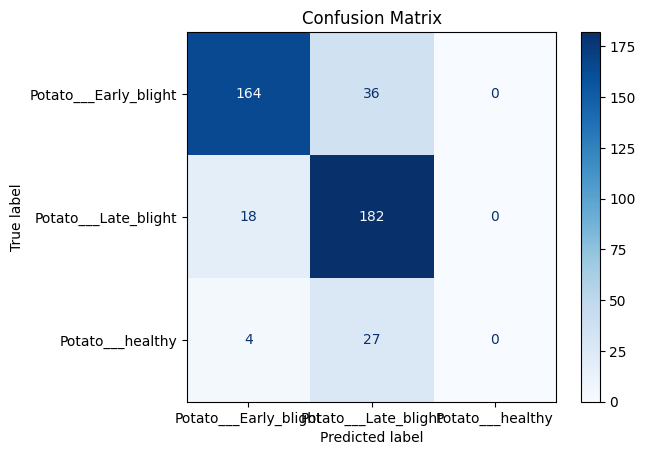

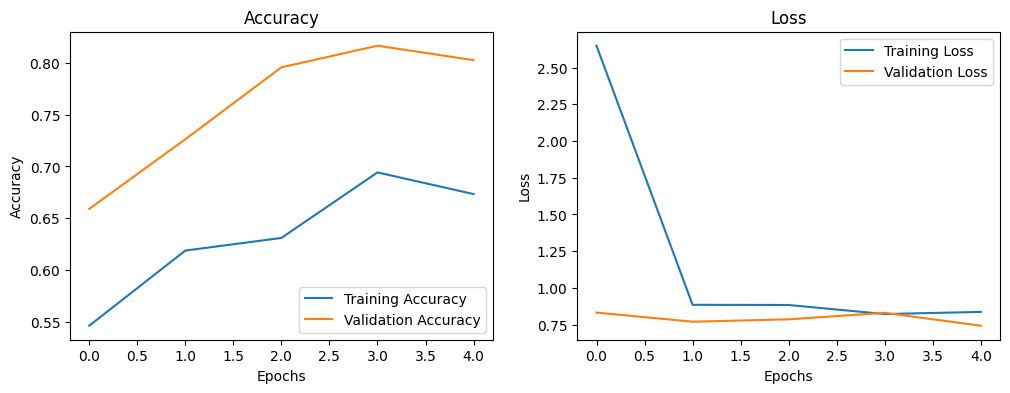

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Define the Path to the Dataset
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"  # Update this path as necessary

# Step 3: Load the Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset (Assuming classes are in subfolders)
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Step 4: Prepare the Data
# Get images and labels from the generator
X, y = [], []
for _ in range(len(train_data)):
    images, labels = next(train_data)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

# Step 6: Build the ResNet Model
# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model with additional custom layers on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer for number of classes
])

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Step 9: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Calculate Accuracy Score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy Score:", accuracy)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 11: Plot Training History (Optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Neural Style Transfer

In [ ]:
import os

dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"
early_blight_path = os.path.join(dataset_dir, "Potato___Early_blight")
late_blight_path = os.path.join(dataset_dir, "Potato___Late_blight")
healthy_path = os.path.join(dataset_dir, "Potato___healthy")


In [ ]:
import random

content_image_path = os.path.join(early_blight_path, random.choice(os.listdir(early_blight_path)))
style_image_path = os.path.join(healthy_path, random.choice(os.listdir(healthy_path)))
print(f"Content Image: {content_image_path}")
print(f"Style Image: {style_image_path}")


Content Image: /content/drive/MyDrive/unzipped_files/Color/Potato___Early_blight/df7e4d39-fb74-4e6d-9d32-04d7d2165135___RS_Early.B 6700.JPG
Style Image: /content/drive/MyDrive/unzipped_files/Color/Potato___healthy/3a1dbeee-089c-43f0-8f51-a92d3687a515___RS_HL 1754.JPG


Content Image: /content/drive/MyDrive/unzipped_files/Color/Potato___Early_blight/87c0254c-c987-4c54-adda-45c5e7346170___RS_Early.B 8848.JPG
Style Image: /content/drive/MyDrive/unzipped_files/Color/Potato___healthy/d1752ed4-a0a7-4075-917d-205c0e785dcf___RS_HL 1911.JPG
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Iteration 0, Loss: 4335448096768.0


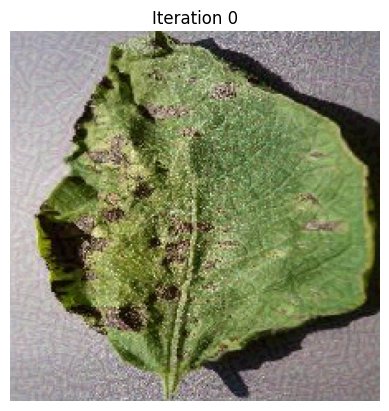

Iteration 100, Loss: 11824333824.0


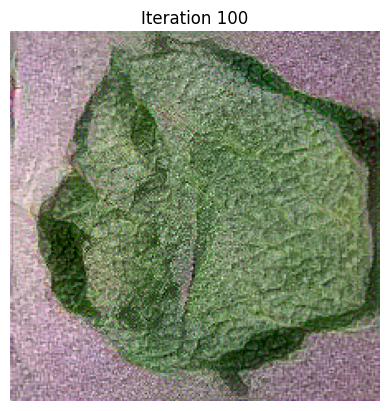

Iteration 200, Loss: 6595013632.0


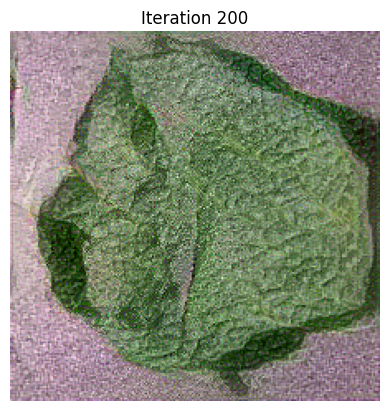

Iteration 300, Loss: 4834895360.0


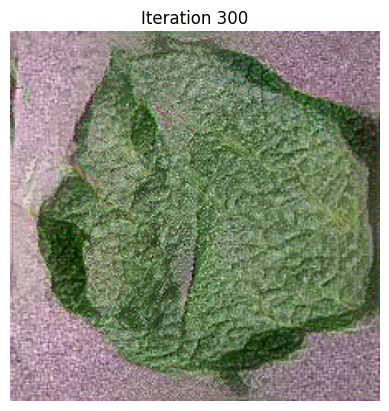

Iteration 400, Loss: 3948889856.0


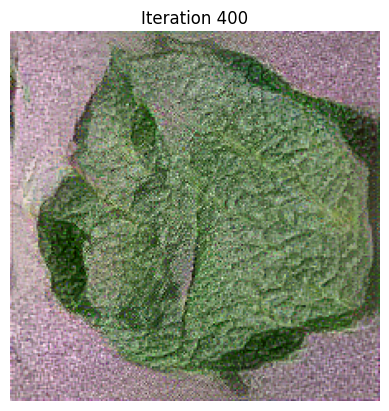

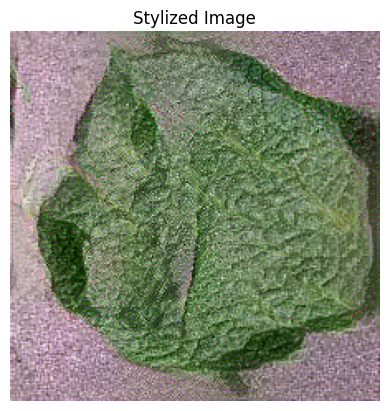

In [ ]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras.models import Model
import os
import random

# Load and Preprocess Images
def load_and_process_img(img_path):
    """Load and preprocess the image."""
    img = kp_image.load_img(img_path, target_size=(224, 224))
    img = kp_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_img(processed_img):
    """Deprocess the image for visualization."""
    x = processed_img.copy()
    x = x.reshape((x.shape[1], x.shape[2], 3))
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]  # Convert BGR to RGB
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Build VGG19 Model
def get_model():
    """Load the VGG19 model and specify the layers for content and style features."""
    vgg = vgg19.VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False

    # Content and Style Layers
    content_layers = ['block5_conv2']  # Extract content features
    style_layers = [
        'block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'
    ]  # Extract style features

    # Create model outputs for the layers
    outputs = [vgg.get_layer(name).output for name in (content_layers + style_layers)]
    model = Model(inputs=vgg.input, outputs=outputs)

    return model, content_layers, style_layers

# Compute Losses
def gram_matrix(input_tensor):
    """Compute the Gram matrix for style loss."""
    channels = int(input_tensor.shape[-1])
    vectorized = tf.reshape(input_tensor, [-1, channels])
    gram = tf.matmul(vectorized, vectorized, transpose_a=True)
    return gram

def compute_content_loss(content, target):
    """Compute content loss."""
    return tf.reduce_mean(tf.square(content - target))

def compute_style_loss(style, target):
    """Compute style loss using Gram matrices."""
    gram_style = gram_matrix(style)
    gram_target = gram_matrix(target)
    return tf.reduce_mean(tf.square(gram_style - gram_target))

def compute_total_loss(model, content_image, style_image, target_image, content_layers, style_layers):
    """Combine content and style loss."""
    outputs = model(target_image)
    content_outputs = outputs[:len(content_layers)]
    style_outputs = outputs[len(content_layers):]

    content_targets = model(content_image)[:len(content_layers)]
    style_targets = model(style_image)[len(content_layers):]

    # Compute content loss
    content_loss = sum(compute_content_loss(c_out, c_tar) for c_out, c_tar in zip(content_outputs, content_targets))

    # Compute style loss
    style_loss = sum(compute_style_loss(s_out, s_tar) for s_out, s_tar in zip(style_outputs, style_targets))

    total_loss = content_loss + 1e-4 * style_loss  # Adjust the weight of the style loss
    return total_loss

# Style Transfer Function
def run_style_transfer(content_path, style_path, num_iterations=500, learning_rate=5.0):
    """Run style transfer."""
    # Load images
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)

    # Load the VGG model
    model, content_layers, style_layers = get_model()

    # Initialize target image
    target_image = tf.Variable(content_image, dtype=tf.float32)

    # Optimizer
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

    # Optimization Loop
    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(target_image)
            loss = compute_total_loss(model, content_image, style_image, target_image, content_layers, style_layers)

        grads = tape.gradient(loss, target_image)
        optimizer.apply_gradients([(grads, target_image)])

        # Log and show progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss.numpy()}")
            img = deprocess_img(target_image.numpy())
            plt.imshow(img)
            plt.title(f"Iteration {i}")
            plt.axis('off')
            plt.show()

    # Return final stylized image
    return deprocess_img(target_image.numpy())

# Define Dataset Paths
dataset_dir = "/content/drive/MyDrive/unzipped_files/Color"
early_blight_path = os.path.join(dataset_dir, "Potato___Early_blight")
late_blight_path = os.path.join(dataset_dir, "Potato___Late_blight")
healthy_path = os.path.join(dataset_dir, "Potato___healthy")

# Randomly select content and style images
import random
content_image_path = os.path.join(early_blight_path, random.choice(os.listdir(early_blight_path)))
style_image_path = os.path.join(healthy_path, random.choice(os.listdir(healthy_path)))

print(f"Content Image: {content_image_path}")
print(f"Style Image: {style_image_path}")

# Perform Style Transfer
result_image = run_style_transfer(content_image_path, style_image_path, num_iterations=500)

# Display Final Stylized Image
plt.imshow(result_image)
plt.title("Stylized Image")
plt.axis('off')
plt.show()


Iteration 0, Total Loss: 4335448096768.0, Content Loss: 0.0, Style Loss: 4.335448221758259e+16
Iteration 100, Total Loss: 11824333824.0, Content Loss: 2272.242431640625, Style Loss: 118243318562816.0
Iteration 200, Total Loss: 6595013632.0, Content Loss: 2316.07177734375, Style Loss: 65950112022528.0
Iteration 300, Total Loss: 4834895360.0, Content Loss: 2348.978515625, Style Loss: 48348929196032.0
Iteration 400, Total Loss: 3948889856.0, Content Loss: 2366.09912109375, Style Loss: 39488877232128.0


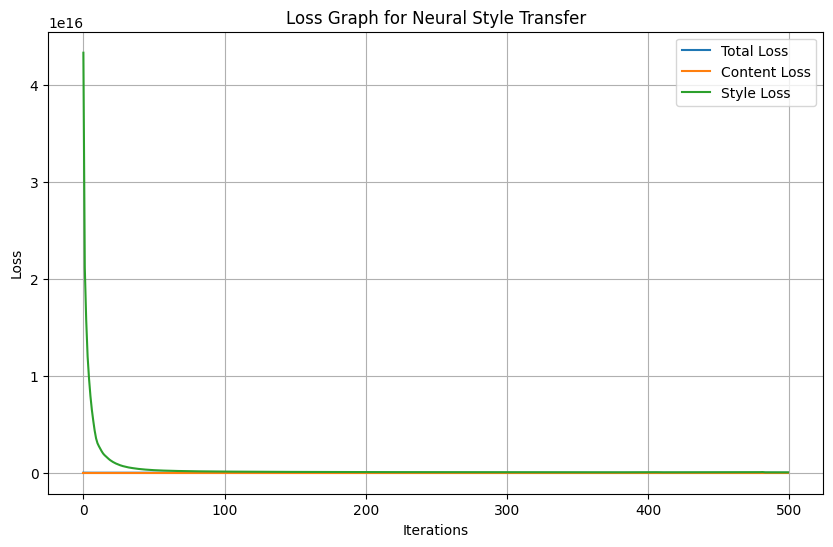

In [ ]:
def run_style_transfer_with_loss_graph(content_path, style_path, num_iterations=500, learning_rate=5.0):
    """Run style transfer and plot the loss graph."""
    # Load images
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)

    # Load the VGG19 model
    model, content_layers, style_layers = get_model()

    # Initialize target image
    target_image = tf.Variable(content_image, dtype=tf.float32)

    # Optimizer
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

    # Loss tracking
    total_losses = []
    content_losses = []
    style_losses = []

    # Optimization loop
    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(target_image)
            outputs = model(target_image)

            # Separate content and style outputs
            content_outputs = outputs[:len(content_layers)]
            style_outputs = outputs[len(content_layers):]

            # Compute content loss
            content_targets = model(content_image)[:len(content_layers)]
            content_loss = sum(compute_content_loss(c_out, c_tar) for c_out, c_tar in zip(content_outputs, content_targets))

            # Compute style loss
            style_targets = model(style_image)[len(content_layers):]
            style_loss = sum(compute_style_loss(s_out, s_tar) for s_out, s_tar in zip(style_outputs, style_targets))

            # Total loss
            total_loss = content_loss + 1e-4 * style_loss

        # Compute gradients and update the target image
        grads = tape.gradient(total_loss, target_image)
        optimizer.apply_gradients([(grads, target_image)])

        # Track losses
        total_losses.append(total_loss.numpy())
        content_losses.append(content_loss.numpy())
        style_losses.append(style_loss.numpy())

        # Log progress
        if i % 100 == 0:
            print(f"Iteration {i}, Total Loss: {total_loss.numpy()}, Content Loss: {content_loss.numpy()}, Style Loss: {style_loss.numpy()}")

    # Plot loss graph
    plt.figure(figsize=(10, 6))
    plt.plot(total_losses, label="Total Loss")
    plt.plot(content_losses, label="Content Loss")
    plt.plot(style_losses, label="Style Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss Graph for Neural Style Transfer")
    plt.legend()
    plt.grid()
    plt.show()

    # Return final stylized image
    return deprocess_img(target_image.numpy())

# Run the style transfer with loss tracking
result_image = run_style_transfer_with_loss_graph(content_image_path, style_image_path, num_iterations=500)



In [ ]:
import tensorflow.keras.backend as K

def compute_feature_similarity(img1, img2, layer="block5_conv2"):
    """
    Compute similarity between two images based on a specific VGG19 layer.
    Args:
        img1, img2: Preprocessed images for comparison.
        layer: Layer name in VGG19 used for extracting features.
    Returns:
        Cosine similarity score.
    """
    # Load VGG19 model
    vgg = vgg19.VGG19(weights='imagenet', include_top=False)
    feature_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer(layer).output)

    # Extract features
    features1 = feature_extractor(img1).numpy()
    features2 = feature_extractor(img2).numpy()

    # Flatten features
    features1 = features1.flatten()
    features2 = features2.flatten()

    # Compute cosine similarity
    cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
    return cosine_similarity

# Evaluate Perceptual Accuracy
def evaluate_accuracy(content_image_path, style_image_path, generated_image):
    """
    Evaluate perceptual accuracy by comparing content and style similarity.
    Args:
        content_image_path: Path to the original content image.
        style_image_path: Path to the style image.
        generated_image: Stylized image generated by the NST model.
    Returns:
        Content similarity and style similarity scores.
    """
    # Load and preprocess images
    content_image = load_and_process_img(content_image_path)
    style_image = load_and_process_img(style_image_path)
    generated_image = np.expand_dims(generated_image, axis=0)
    generated_image = vgg19.preprocess_input(generated_image)

    # Compute content similarity
    content_similarity = compute_feature_similarity(content_image, generated_image, layer="block5_conv2")

    # Compute style similarity (use a lower-level style layer)
    style_similarity = compute_feature_similarity(style_image, generated_image, layer="block1_conv1")

    print(f"Content Similarity: {content_similarity:.4f}")
    print(f"Style Similarity: {style_similarity:.4f}")

    return content_similarity, style_similarity

# Evaluate the accuracy of the generated image
content_accuracy, style_accuracy = evaluate_accuracy(content_image_path, style_image_path, result_image)

# Output Results
print(f"Content Accuracy (similarity to content): {content_accuracy * 100:.2f}%")
print(f"Style Accuracy (similarity to style): {style_accuracy * 100:.2f}%")


Content Similarity: 0.4378
Style Similarity: 0.3990
Content Accuracy (similarity to content): 43.78%
Style Accuracy (similarity to style): 39.90%


# Graph Convolutional Networks (GCN)

Epoch 0, Loss: 0.708082914352417
Epoch 10, Loss: 0.6947896480560303
Epoch 20, Loss: 0.6937695741653442
Epoch 30, Loss: 0.6932219862937927
Epoch 40, Loss: 0.6931737065315247
Epoch 50, Loss: 0.693148136138916
Epoch 60, Loss: 0.6931496262550354
Epoch 70, Loss: 0.6931473612785339
Epoch 80, Loss: 0.6931473016738892
Epoch 90, Loss: 0.6931473612785339
Predictions: [0 0 0 0]


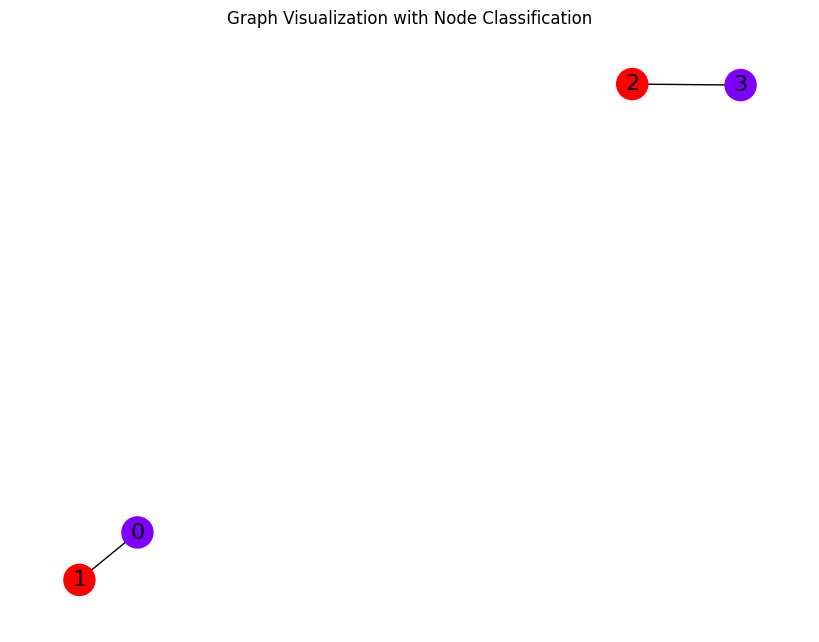

Predictions: [0 0 0 0]
Accuracy: 50.00%


In [ ]:
# Installing necessary libraries (run this in your terminal or notebook)
# !pip install torch_geometric

# Import Necessary Libraries
import torch
import torch_geometric
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Step 2: Create the Graph Dataset (Example)
# Here, we define a simple graph with nodes and edges.
# Let's assume we have a graph with 4 nodes and 4 edges.

# Define the edges (edges are bidirectional)
edge_index = torch.tensor([[0, 1, 2, 3],
                           [1, 0, 3, 2]], dtype=torch.long)  # [2, num_edges] format

# Define the node features (e.g., 4 nodes with 3 features each)
x = torch.tensor([[1, 0, 0],  # Node 0 features
                  [0, 1, 0],  # Node 1 features
                  [0, 0, 1],  # Node 2 features
                  [1, 1, 0]], dtype=torch.float)  # Node 3 features

# Define the labels for node classification (e.g., 4 classes)
y = torch.tensor([0, 1, 1, 0], dtype=torch.long)

# Create a Data object in PyG format
data = Data(x=x, edge_index=edge_index, y=y)

# Step 3: Define the Graph Convolutional Network (GCN) Model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))  # First GCN layer with ReLU activation
        x = self.conv2(x, edge_index)  # Second GCN layer (no activation for final layer)
        return x

# Step 4: Initialize the Model, Loss Function, and Optimizer
model = GCN(in_channels=3, hidden_channels=16, out_channels=2)  # 3 features -> 16 hidden -> 2 output classes
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Step 5: Train the Model
num_epochs = 100

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()  # Zero the gradients
    out = model(data)  # Forward pass through the model
    loss = criterion(out, data.y)  # Compute the loss (cross-entropy)
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Step 6: Test the Model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    out = model(data)  # Forward pass
    _, predicted = out.max(dim=1)  # Get the predicted class labels

    # Print the predictions for each node
    print("Predictions:", predicted.numpy())

# Step 7: Visualize the Graph
# Create a networkx graph for visualization
G = nx.Graph()

# Add nodes and edges from the edge_index tensor
for i in range(data.x.shape[0]):
    G.add_node(i, feature=data.x[i].numpy(), label=data.y[i].item())

for i in range(data.edge_index.shape[1]):
    G.add_edge(data.edge_index[0, i].item(), data.edge_index[1, i].item())

# Visualize the graph using networkx
pos = nx.spring_layout(G)  # Layout for node positions
node_labels = nx.get_node_attributes(G, 'label')  # Node labels
node_colors = [data.y[i].item() for i in range(data.x.shape[0])]  # Color by class label

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500, font_size=16)
plt.title('Graph Visualization with Node Classification')
plt.show()
# Step 6: Test the Model and Calculate Accuracy
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    out = model(data)  # Forward pass
    _, predicted = out.max(dim=1)  # Get the predicted class labels

    # Print the predictions for each node
    print("Predictions:", predicted.numpy())

    # Calculate accuracy
    correct = (predicted == data.y).sum().item()  # Number of correct predictions
    accuracy = correct / data.y.size(0)  # Accuracy as a ratio of correct predictions to total nodes
    print(f'Accuracy: {accuracy * 100:.2f}%')


# Graph Neural Networks (GNN)

Epoch 0, Loss: 0.6991084814071655
Epoch 50, Loss: 0.6080827713012695
Epoch 100, Loss: 0.5866097211837769
Epoch 150, Loss: 0.5542565584182739
Accuracy: 80.00%


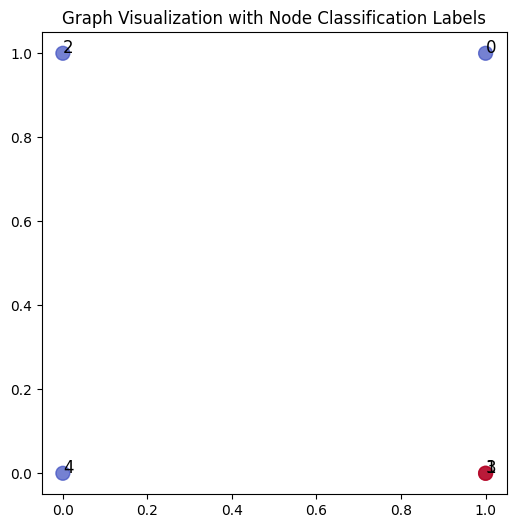

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data  # Correct import
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Load and Prepare Data (Example)
# This part will vary based on how you want to represent your graph data.
# For simplicity, let's create an artificial graph data.

# Example: Create 5 nodes and 4 edges
# Nodes feature matrix X (5 nodes, each with 3 features)
X = torch.tensor([[1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1]], dtype=torch.float)

# Adjacency matrix for the graph (edges between nodes)
# (In this case, a simple graph with 5 nodes and 4 edges)
edge_index = torch.tensor([[0, 1, 2, 3], [1, 2, 3, 4]], dtype=torch.long)

# Labels for node classification (e.g., disease class)
y = torch.tensor([0, 1, 0, 1, 0], dtype=torch.long)  # Example labels (0: healthy, 1: infected)

# Step 3: Define the Graph Convolutional Network Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))  # Apply first GCN layer and ReLU activation
        x = F.dropout(x, training=self.training)  # Dropout for regularization
        x = self.conv2(x, edge_index)  # Apply second GCN layer
        return F.log_softmax(x, dim=1)  # Apply log softmax for classification

# Step 4: Initialize and Train the Model
input_dim = X.shape[1]  # Number of features per node
hidden_dim = 16  # Number of hidden units in the first GCN layer
output_dim = len(set(y.numpy()))  # Number of output classes (e.g., healthy or infected)

model = GCN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Step 5: Training Loop
def train(model, optimizer, X, edge_index, y, epochs=200):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(X, edge_index)  # Forward pass
        loss = F.nll_loss(out, y)  # Negative log-likelihood loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        if epoch % 50 == 0:  # Print progress
            print(f"Epoch {epoch}, Loss: {loss.item()}")

train(model, optimizer, X, edge_index, y, epochs=200)

# Step 6: Evaluate the Model
def evaluate(model, X, edge_index, y):
    model.eval()
    with torch.no_grad():
        out = model(X, edge_index)  # Forward pass
        pred = out.argmax(dim=1)  # Predicted class labels
        correct = (pred == y).sum().item()
        accuracy = correct / len(y)
        print(f"Accuracy: {accuracy * 100:.2f}%")

evaluate(model, X, edge_index, y)

# Step 7: Visualize the Graph (Optional)
# Plot the graph structure
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy(), cmap='coolwarm', s=100, alpha=0.7)
for i in range(X.shape[0]):
    plt.text(X[i, 0].item(), X[i, 1].item(), str(i), fontsize=12)
plt.title("Graph Visualization with Node Classification Labels")
plt.show()


# Deep Q-Networks (DQN)